## Downloads

In [ ]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


# Image Preprocessing

### Imports

In [ ]:
import rasterio
import os
from rasterio.plot import show
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff
from osgeo import gdal
import numpy as np
import pandas as pd
import cv2

### Reading Tiff Image Files

In [ ]:
path1 = '/content/drive/MyDrive/ISRO_Data/k3_20191229071905_40634_06371168_l1g_nrg.tif'
path2 = '/content/drive/MyDrive/ISRO_Data/k3_20191229071905_40634_06371168_l1g_p.tif'

In [ ]:
ds1 = gdal.Open(path1)
ds2 = gdal.Open(path2)

In [ ]:
# import 
gt1 = ds1.GetGeoTransform()
proj1 = ds1.GetProjection()

band1 = ds1.GetRasterBand(1)
array1 = band1.ReadAsArray()

band2 = ds1.GetRasterBand(2)
array1 = band2.ReadAsArray()

band3 = ds1.GetRasterBand(3)
array3 = band3.ReadAsArray()

In [ ]:
gt2 = ds2.GetGeoTransform()
proj2 = ds2.GetProjection()
img_aray2 = ds2.ReadAsArray()

#### Transformation and Projection Informations

In [ ]:
gt1

(635809.9893442297, 2.8, 0.0, 2496068.408324141, 0.0, -2.8)

In [ ]:
gt2

(635809.9893442297, 0.7, 0.0, 2496067.008324141, 0.0, -0.7)

In [ ]:
proj1

'PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32645"]]'

In [ ]:
proj2

'PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32645"]]'

In [ ]:
img1 = rasterio.open(path1)
img2 = rasterio.open(path2)

In [ ]:
full_img_1 = img1.read()
full_img_2 = img2.read()

In [ ]:
# Geo Ref Information
!gdalinfo -nomd /content/drive/MyDrive/ISRO_Data/k3_20191229071905_40634_06371168_l1g_p.tif

Driver: GTiff/GeoTIFF
Files: /content/drive/MyDrive/ISRO_Data/k3_20191229071905_40634_06371168_l1g_p.tif
Size is 20193, 18720
Coordinate System is:
PROJCS["WGS 84 / UTM zone 45N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",87],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32645"]]
Origin = (635809.989344229688868,2496067.008324141148478)
Pixel Size = (0.70000000000

### Visualization

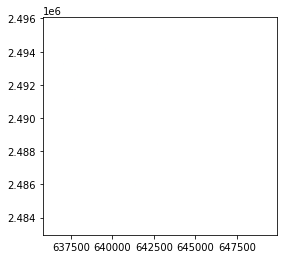

<AxesSubplot:>

In [ ]:
show(img1)

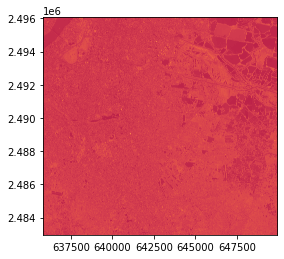

<AxesSubplot:>

In [ ]:
show(img2, cmap = 'Spectral')

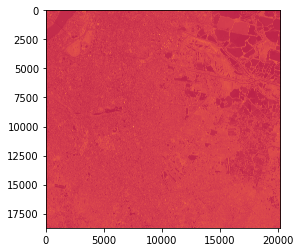

In [ ]:
plt.imshow(full_img_2[0],cmap = 'Spectral')

### Image Descriptions

In [ ]:
full_img_2[0].shape[0]

18720

In [ ]:
# No. Bands
count1 = img1.count
count2 = img2.count
print('Image 1 bands: {count1} Image 2 bands: {count2}'.format(count1 = count1, count2 = count2))

Image 1 bands: 3 Image 2 bands: 1


In [ ]:
img1.meta

{'count': 3,
 'crs': CRS.from_epsg(32645),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 4681,
 'nodata': None,
 'transform': Affine(2.8, 0.0, 635809.9893442297,
       0.0, -2.8, 2496068.408324141),
 'width': 5049}

In [ ]:
img2.meta

{'count': 1,
 'crs': CRS.from_epsg(32645),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 18720,
 'nodata': None,
 'transform': Affine(0.7, 0.0, 635809.9893442297,
       0.0, -0.7, 2496067.008324141),
 'width': 20193}

In [ ]:
new_img2 = ((full_img_2 - full_img_2.min()) * (1/(full_img_2.max() - full_img_2.min()) * 255))
new_img2 = new_img2.reshape(new_img2.shape[1],new_img2.shape[2])

In [ ]:
new_img1_b1 = ((full_img_1[0] - full_img_1[0].min()) * (1/(full_img_1[0].max() - full_img_1[0].min()) * 255))
new_img1_b2 = ((full_img_1[1] - full_img_1[1].min()) * (1/(full_img_1[1].max() - full_img_1[1].min()) * 255))
new_img1_b3 = ((full_img_1[2] - full_img_1[2].min()) * (1/(full_img_1[2].max() - full_img_1[2].min()) * 255))
new_img1_3L = np.stack([new_img1_b1/3,new_img1_b2/3,new_img1_b2/3],axis = 2)
new_img1 = np.mean(new_img1_3L, axis=2)

### Creating Patches (Tiles)

In [ ]:
driver = gdal.GetDriverByName("GTiff")
driver.Register()

In [ ]:
if not os.path.isdir('patches/'):
    os.mkdir('patches/')
    
if not os.path.isdir('patches/lr_image/'):
    os.mkdir('patches/lr_image/')
    
# for img in range(full_img_1.shape[0]):

large_image = new_img1

patches_img = patchify(large_image, (64, 64), step=64) 
x_origin = gt1[0]
y_origin = gt1[3]
x_px = gt1[1]
y_px = gt1[5]
x_rot = gt1[2]
y_rot = gt1[4]
for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        x_cord = x_origin + x_px*j*64
        y_cord = y_origin + y_px*i*64
        single_patch_img = patches_img[i,j,:,:]
        img_name = 'patches/lr_image/' + 'image_' + '0' + '_' + str(i)+str(j)+ '.tif'
        outds = driver.Create(img_name, xsize = single_patch_img.shape[1],
                  ysize = single_patch_img.shape[0], bands = 1, 
                  eType = gdal.GDT_Int16)
        gt = (x_cord,x_px,x_rot,y_cord,y_rot,y_px)
        outds.SetGeoTransform(gt)
        outds.SetProjection(proj1)
        outband = outds.GetRasterBand(1)
        outband.WriteArray(single_patch_img)
        outband.FlushCache()

In [ ]:
if not os.path.isdir('patches/hr_image/'):
    os.mkdir('patches/hr_image/')

# for img in range(full_img_2.shape[0]):
x_origin = gt2[0]
y_origin = gt2[3]
x_px = gt2[1]
y_px = gt2[5]
x_rot = gt2[2]
y_rot = gt2[4]

large_image = new_img2

patches_img = patchify(large_image, (256, 256), step=256)

for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        x_cord = x_origin + x_px*j*256
        y_cord = y_origin + y_px*i*256
        single_patch_img = patches_img[i,j,:,:]
        img_name = 'patches/hr_image/' + 'image_' + '0' + '_' + str(i)+str(j)+ '.tif'
        outds = driver.Create(img_name, xsize = single_patch_img.shape[1],
                  ysize = single_patch_img.shape[0], bands = 1, 
                  eType = gdal.GDT_Int16)
        gt = (x_cord,x_px,x_rot,y_cord,y_rot,y_px)
        outds.SetGeoTransform(gt)
        outds.SetProjection(proj2)
        outband = outds.GetRasterBand(1)
        outband.WriteArray(single_patch_img)
        outband.FlushCache()

### Patches(Tiles) Visualization

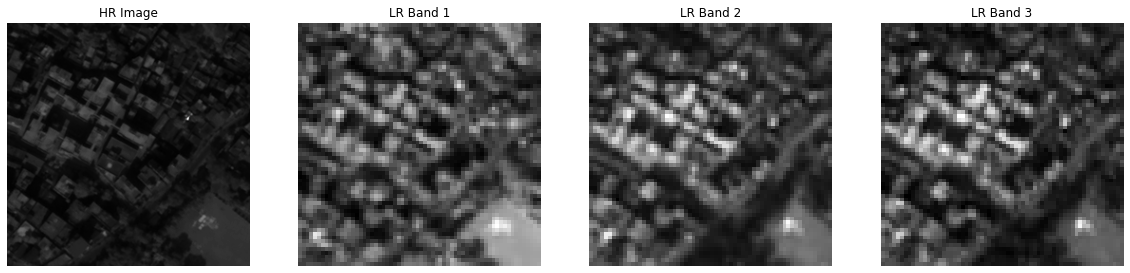

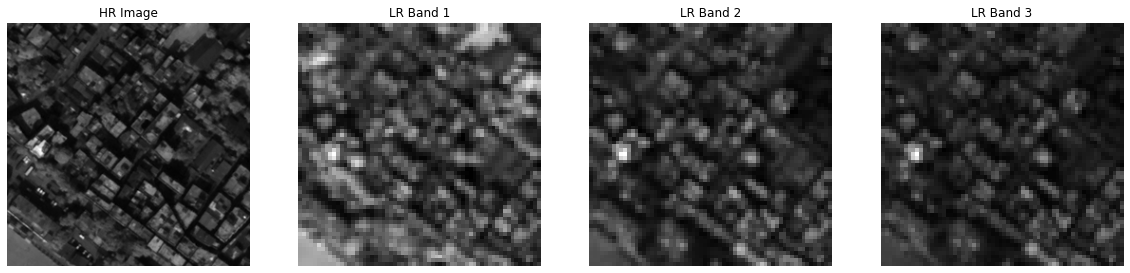

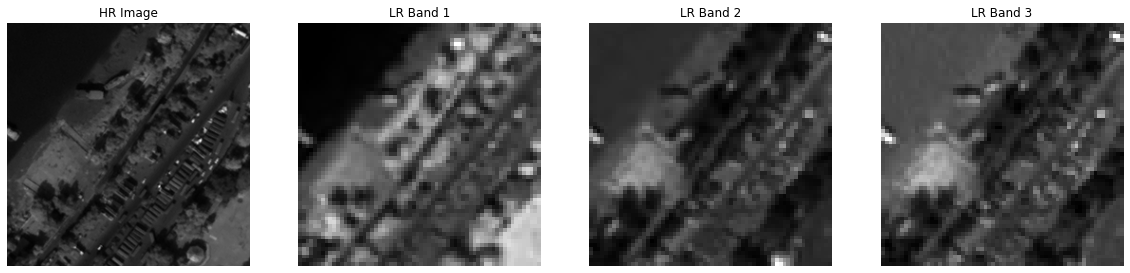

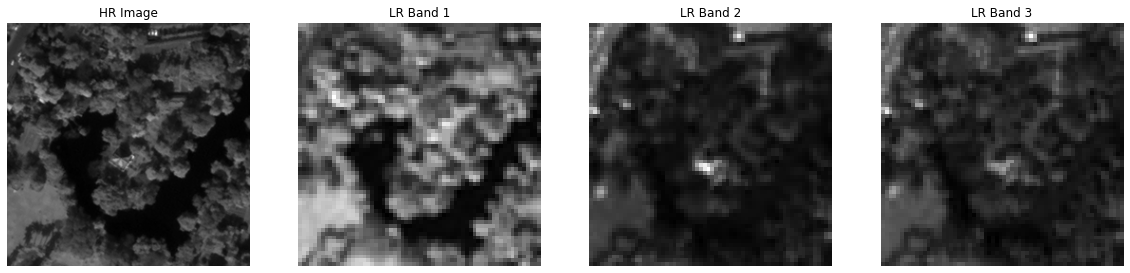

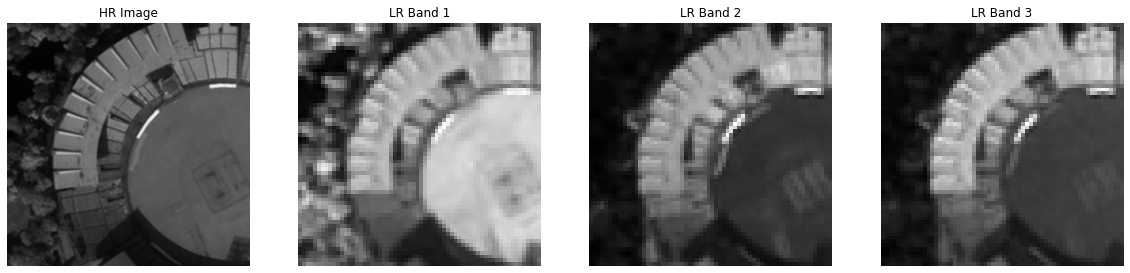

In [ ]:
lr_list = os.listdir('patches/lr_image/')
hr_list = os.listdir('patches/hr_image/')
lr_list.sort()
hr_list.sort()

def scaleCCC(x):
    return((x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x,2)))

for hr_img in hr_list[0:5]:
    hr_img_open = rasterio.open('patches/hr_image/' + hr_img)
    lr_img_open_band_1 =  rasterio.open('patches/lr_image/' + hr_img)
    lr_img_open_band_2 =  rasterio.open('patches/lr_image/' + hr_img[:6] + '1' +hr_img[7:])
    lr_img_open_band_3 =  rasterio.open('patches/lr_image/' + hr_img[:6] + '2' +hr_img[7:])  
    hr_img_array = hr_img_open.read()
    lr_img_array_band_1 = lr_img_open_band_1.read()
    lr_img_array_band_2 = lr_img_open_band_2.read()
    lr_img_array_band_3 = lr_img_open_band_3.read()
    
    fig, axes = plt.subplots(1,4,figsize=(20,20))
    
    ax1 = axes[0]
    ax1.set_axis_off()
    ax1.imshow(scaleCCC(hr_img_array[0]),cmap = 'gray')
    ax1.set_title('HR Image')
    
    ax2 = axes[1]
    ax2.set_axis_off()
    ax2.imshow(scaleCCC(lr_img_array_band_1[0]),cmap = 'gray')
    ax2.set_title('LR Band 1')
    
    ax3 = axes[2]
    ax3.set_axis_off()
    ax3.imshow(scaleCCC(lr_img_array_band_2[0]),cmap = 'gray')
    ax3.set_title('LR Band 2')
    
    ax4 = axes[3]
    ax4.set_axis_off()
    ax4.imshow(scaleCCC(lr_img_array_band_3[0]),cmap = 'gray')
    ax4.set_title('LR Band 3')
    

    plt.show()


# Pretrained Model Testing

### Downloading Models

In [ ]:
# Cloning the EDSR-SRGAN Repo
!git clone https://github.com/krasserm/super-resolution.git


Cloning into 'super-resolution'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 408 (delta 0), reused 2 (delta 0), pack-reused 405
Receiving objects: 100% (408/408), 48.16 MiB | 29.06 MiB/s, done.
Resolving deltas: 100% (214/214), done.


### Imports

In [ ]:
import cv2
import numpy as np
import os
import glob
import shutil
import matplotlib.pyplot as plt
import pandas as pd

### Testing LR and HR Image Segmentation

In [ ]:
lr_img_array_total.shape

(1, 64, 64)

In [ ]:
hr_dir = 'OriginalImages/'
lr_dir = 'LowResImages/'


if not os.path.isdir(hr_dir):
    os.mkdir(hr_dir)
else:
    shutil.rmtree(hr_dir)
    os.mkdir(hr_dir)
    
if not os.path.isdir(lr_dir):
    os.mkdir(lr_dir)
else:
    shutil.rmtree(lr_dir)
    os.mkdir(lr_dir)
    
lr_list = os.listdir('patches/lr_image/')
hr_list = os.listdir('patches/hr_image/')
lr_list.sort()
hr_list.sort()

lr_img_array_list = []
for hr_img in hr_list:
    # Open GeoRef
    ds_hr = gdal.Open('/content/patches/hr_image/' + hr_img)
    ds_lr = gdal.Open('/content/patches/lr_image/' + hr_img)
    # Open Images
    hr_img_open = rasterio.open('/content/patches/hr_image/' + hr_img)
    lr_img_open_band_1 =  rasterio.open('/content/patches/lr_image/' + hr_img[:6] + '0' +hr_img[7:])
    lr_img_open_band_2 =  rasterio.open('/content/patches/lr_image/' + hr_img[:6] + '1' +hr_img[7:])
    lr_img_open_band_3 =  rasterio.open('/content/patches/lr_image/'+ hr_img[:6] + '2' +hr_img[7:])  
    hr_img_array = hr_img_open.read()
    lr_img_array_band_1 = lr_img_open_band_1.read()
    lr_img_array_band_2 = lr_img_open_band_2.read()[0]
    lr_img_array_band_3 = lr_img_open_band_3.read()[0]
    lr_img_array_total = np.stack([lr_img_array_band_1, lr_img_array_band_2, lr_img_array_band_3], axis=2)
    lr_img_array_total = cv2.normalize(lr_img_array_total, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    hr_img_array_total = cv2.normalize(hr_img_array, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    lr_img_array_list.append(lr_img_array_total)
    
    # Writing of LR Image
    gt_hr = ds_hr.GetGeoTransform()
    proj_hr = ds_hr.GetProjection()
    out_hr = driver.Create(hr_dir + hr_img, xsize = hr_img_array_total[0].shape[1],
              ysize = hr_img_array_total[0].shape[0], bands = 1, 
              eType = gdal.GDT_Byte)
    out_hr.SetGeoTransform(gt_hr)
    out_hr.SetProjection(proj_hr)
    outband_hr = out_hr.GetRasterBand(1)
    outband_hr.WriteArray(hr_img_array_total[0])
    outband_hr.FlushCache()

    # Writing of HR Image
    gt_lr = ds_lr.GetGeoTransform()
    proj_lr = ds_lr.GetProjection()
    out_lr = driver.Create(lr_dir + hr_img, xsize = lr_img_array_total[0].shape[1],
              ysize = lr_img_array_total[0].shape[0], bands = 1, 
              eType = gdal.GDT_Byte)
    out_lr.SetGeoTransform(gt_lr)
    out_lr.SetProjection(proj_lr)
    outband_lr = out_lr.GetRasterBand(1)
    outband_lr.WriteArray(lr_img_array_total[0])
    outband_lr_1 = out_lr.GetRasterBand(1)
    outband_lr_1.WriteArray(lr_img_array_total[:,:,0])
    outband_lr_2 = out_lr.GetRasterBand(2)
    outband_lr_2.WriteArray(lr_img_array_total[:,:,1])
    outband_lr_3 = out_lr.GetRasterBand(3)
    outband_lr_3.WriteArray(lr_img_array_total[:,:,2])
    out_lr.FlushCache()

In [ ]:
if  os.path.isdir('/results'):
    shutil.rmtree('/results')
os.mkdir('/results')
images = hr_list[0:5]

### EDSR

In [ ]:
### EDSR Model
#%cd ..


%cd super-resolution
from model.common import resolve
from model.edsr import edsr
from utils import load_image, plot_sample

model = edsr(scale=4, num_res_blocks=16)

%cd ..

model.load_weights('/content/edsr-weights.h5')
if not os.path.isdir('results/'):
    os.mkdir('results/')

results_edsr = 'results/EDSR/'

if not os.path.isdir(results_edsr):
    os.mkdir(results_edsr)


while i < (len(lr_img_array_list) - (len(lr_img_array_list)%10) + 1 ):
  print(i)
  if i != len(lr_img_array_list) - (len(lr_img_array_list)%10): 
    sr = resolve(model, lr_img_array_list[i:i+10])
    images = hr_list[i:i+10]
  else:
    sr = resolve(model, lr_img_array_list[i:])
    images = hr_list[i:]   

  for img,img_array in zip(images,sr):
      # cv2.imwrite(results_edsr + img, img_array.numpy())
      ds = gdal.Open('/content/patches/lr_image/' + img)

      gt = ds.GetGeoTransform()
      proj = ds.GetProjection()
      # New Transformes
      x_origin = gt[0]
      y_origin = gt[3]
      x_px = gt[1]/4
      y_px = gt[5]/4
      x_rot = gt[2]
      y_rot = gt[4]
      # Output Geo-references
      out_ds = driver.Create(results_edsr + img, xsize = img_array.numpy().shape[1],
                ysize = img_array.numpy().shape[0], bands = 3, 
                eType = gdal.GDT_Byte)
      gt = (x_origin,x_px,x_rot,y_origin,y_rot,y_px)
      out_ds.SetGeoTransform(gt)
      out_ds.SetProjection(proj)
      outband_ds_1 = out_ds.GetRasterBand(1)
      outband_ds_1.WriteArray(img_array.numpy()[:,:,0])
      outband_ds_2 = out_ds.GetRasterBand(2)
      outband_ds_2.WriteArray(img_array.numpy()[:,:,1])
      outband_ds_3 = out_ds.GetRasterBand(3)
      outband_ds_3.WriteArray(img_array.numpy()[:,:,2])
      out_ds.FlushCache()
  i += 10 

/content/super-resolution
/content
3070
3080
3090
3100
3110
3120
3130
3140
3150
3160
3170
3180
3190
3200
3210
3220
3230
3240
3250
3260
3270
3280
3290
3300
3310
3320
3330
3340
3350
3360
3370
3380
3390
3400
3410
3420
3430
3440
3450
3460
3470
3480
3490
3500
3510
3520
3530
3540
3550
3560
3570
3580
3590
3600
3610
3620
3630
3640
3650
3660
3670
3680
3690
3700
3710
3720
3730
3740
3750
3760
3770
3780
3790
3800
3810
3820
3830
3840
3850
3860
3870
3880
3890
3900
3910
3920
3930
3940
3950
3960
3970
3980
3990
4000
4010
4020
4030
4040
4050
4060
4070
4080
4090
4100
4110
4120
4130
4140
4150
4160
4170
4180
4190
4200
4210
4220
4230
4240
4250
4260
4270
4280
4290
4300
4310
4320
4330
4340
4350
4360
4370
4380
4390
4400
4410
4420
4430
4440
4450
4460
4470
4480
4490
4500
4510
4520
4530
4540
4550
4560
4570
4580
4590
4600
4610
4620
4630
4640
4650
4660
4670
4680
4690
4700
4710
4720
4730
4740
4750
4760
4770
4780
4790
4800
4810
4820
4830
4840
4850
4860
4870
4880
4890
4900
4910
4920
4930
4940
4950
4960
4970
4980
4990


In [ ]:
# Zipping The contents
!zip -r /content/edsr.zip /content/results/EDSR

Streaming output truncated to the last 5000 lines.
  adding: content/results/EDSR/image_0_5115.tif (deflated 21%)
  adding: content/results/EDSR/image_0_4649.tif (deflated 17%)
  adding: content/results/EDSR/image_0_5669.tif (deflated 22%)
  adding: content/results/EDSR/image_0_5568.tif (deflated 33%)
  adding: content/results/EDSR/image_0_5970.tif (deflated 22%)
  adding: content/results/EDSR/image_0_6816.tif (deflated 18%)
  adding: content/results/EDSR/image_0_4062.tif (deflated 45%)
  adding: content/results/EDSR/image_0_4919.tif (deflated 19%)
  adding: content/results/EDSR/image_0_2147.tif (deflated 33%)
  adding: content/results/EDSR/image_0_2127.tif (deflated 17%)
  adding: content/results/EDSR/image_0_1629.tif (deflated 16%)
  adding: content/results/EDSR/image_0_1720.tif (deflated 22%)
  adding: content/results/EDSR/image_0_1377.tif (deflated 36%)
  adding: content/results/EDSR/image_0_4920.tif (deflated 23%)
  adding: content/results/EDSR/image_0_4859.tif (deflated 38%)
  ad

In [ ]:
# EDSR Results


results_edsr = '/results/EDSR/'
if not os.path.isdir(results_edsr):
    os.mkdir(results_edsr)

for img,img_array in zip(images,sr):
    cv2.imwrite(results_edsr + img, img_array.numpy())

### SRGAN

In [ ]:
### EDSR Model
#%cd ..

%cd super-resolution
from model.common import resolve
from model.srgan import generator, discriminator
from utils import load_image, plot_sample

gan_generator = generator()

%cd ..
gan_generator.load_weights('/content/gan_generator.h5')


results_srgan = 'results/SRGAN/'

if not os.path.isdir(results_srgan):
    os.mkdir(results_srgan)

i = 0
while i < (len(lr_img_array_list) - (len(lr_img_array_list)%10) + 1 ):
  print(i)
  if i != len(lr_img_array_list) - (len(lr_img_array_list)%10): 
    sr = resolve(gan_generator, lr_img_array_list[i:i+10])
    images = hr_list[i:i+10]
  else:
    sr = resolve(gan_generator, lr_img_array_list[i:])
    images = hr_list[i:]   

  for img,img_array in zip(images,sr):
      ds = gdal.Open('/content/patches/lr_image/' + img)

      gt = ds.GetGeoTransform()
      proj = ds.GetProjection()

      x_origin = gt[0]
      y_origin = gt[3]
      x_px = gt[1]/4
      y_px = gt[5]/4
      x_rot = gt[2]
      y_rot = gt[4]
      # Output Geo-references
      out_ds = driver.Create(results_srgan + img, xsize = img_array.numpy().shape[1],
                ysize = img_array.numpy().shape[0], bands = 3, 
                eType = gdal.GDT_Byte)
      gt = (x_origin,x_px,x_rot,y_origin,y_rot,y_px)
      out_ds.SetGeoTransform(gt)
      out_ds.SetProjection(proj)
      outband_ds_1 = out_ds.GetRasterBand(1)
      outband_ds_1.WriteArray(img_array.numpy()[:,:,0])
      outband_ds_2 = out_ds.GetRasterBand(2)
      outband_ds_2.WriteArray(img_array.numpy()[:,:,1])
      outband_ds_3 = out_ds.GetRasterBand(3)
      outband_ds_3.WriteArray(img_array.numpy()[:,:,2])
      out_ds.FlushCache()
  i += 10 

/content/super-resolution
/content
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2

In [ ]:
# Zipping The contents
!zip -r /content/srgan.zip /content/results/SRGAN

Streaming output truncated to the last 5000 lines.
  adding: content/results/SRGAN/image_0_4730.tif (deflated 17%)
  adding: content/results/SRGAN/image_0_5115.tif (deflated 16%)
  adding: content/results/SRGAN/image_0_4649.tif (deflated 12%)
  adding: content/results/SRGAN/image_0_5669.tif (deflated 15%)
  adding: content/results/SRGAN/image_0_5568.tif (deflated 24%)
  adding: content/results/SRGAN/image_0_5970.tif (deflated 16%)
  adding: content/results/SRGAN/image_0_6816.tif (deflated 14%)
  adding: content/results/SRGAN/image_0_4062.tif (deflated 34%)
  adding: content/results/SRGAN/image_0_4919.tif (deflated 14%)
  adding: content/results/SRGAN/image_0_2147.tif (deflated 26%)
  adding: content/results/SRGAN/image_0_2127.tif (deflated 13%)
  adding: content/results/SRGAN/image_0_1629.tif (deflated 12%)
  adding: content/results/SRGAN/image_0_1720.tif (deflated 17%)
  adding: content/results/SRGAN/image_0_1377.tif (deflated 25%)
  adding: content/results/SRGAN/image_0_4920.tif (def

In [ ]:
!zip -r /content/results/AE /content/results/NEW30

  adding: content/results/NEW30/ (stored 0%)
  adding: content/results/NEW30/image_0_070.tif (deflated 75%)
  adding: content/results/NEW30/image_0_059.tif (deflated 76%)
  adding: content/results/NEW30/image_0_052.tif (deflated 36%)
  adding: content/results/NEW30/image_0_06.tif (deflated 99%)
  adding: content/results/NEW30/image_0_045.tif (deflated 22%)
  adding: content/results/NEW30/image_0_063.tif (deflated 79%)
  adding: content/results/NEW30/image_0_066.tif (deflated 63%)
  adding: content/results/NEW30/image_0_028.tif (deflated 30%)
  adding: content/results/NEW30/image_0_033.tif (deflated 15%)
  adding: content/results/NEW30/image_0_014.tif (deflated 37%)
  adding: content/results/NEW30/image_0_026.tif (deflated 14%)
  adding: content/results/NEW30/image_0_07.tif (deflated 90%)
  adding: content/results/NEW30/image_0_050.tif (deflated 67%)
  adding: content/results/NEW30/image_0_048.tif (deflated 10%)
  adding: content/results/NEW30/image_0_060.tif (deflated 98%)
  adding: co